## **Feature Engineering On Spatial and Temporal Data**

# **Preparations**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_validate
import geopandas as gpd

# **Example 1: Date Decomposition**
Date Decomposition is a common feature engineering method on the time-series data. The reason for why I choose to provide this example: many time-series data will be provided with a plenty of data with a time feature. For example, we want to observe the trend of the PM10 Concentration for Washington DC. If we plot the raw data, the graph will be messy, and the time label(x-axis) will concide with each other. So, we can use the Date Decomposition to do feature engineering. We convert the time feature from DD/MM/YY to month. Then, the pm10 values are aggregated for different months and their average is calculated as the pm10 concentration for the corresponding month. This allows us to greatly reduce the number of data points and make our images more intuitive. The x-axis labels in the image are also clearer because the time feature is changed from days to months. This is a very simple feature engineering applied to spatial and temporal data. but this method can help us to have a preliminary understanding of the original data. It is very suitable for use in the initial analysis of data. We will also use this method in our next examples.

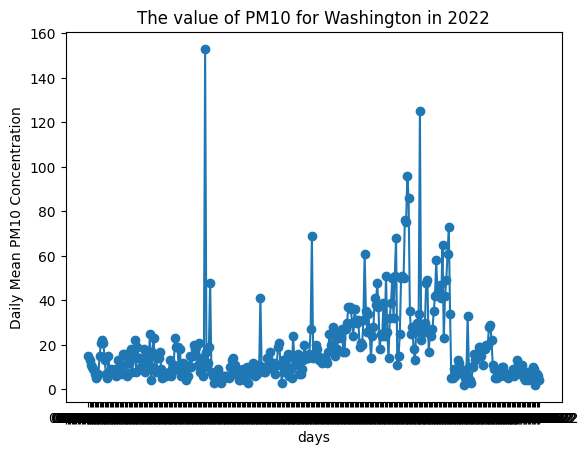

In [2]:
#load the data for example 1
DC_data = pd.read_csv('Washington_new.csv')
#plot the raw data
plt.plot(DC_data['Date'] ,DC_data['Daily Mean PM10 Concentration'] , marker = 'o')
plt.xlabel('days')
plt.ylabel('Daily Mean PM10 Concentration')
plt.title('The value of PM10 for Washington in 2022')
plt.show()

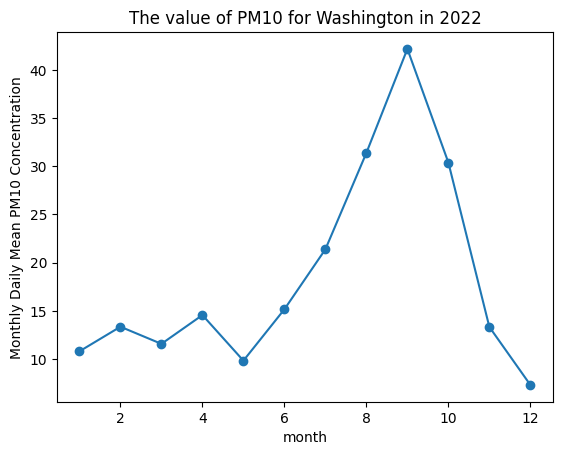

In [3]:
#Convert the date from DD/MM/YY to month
DC_data['month'] = pd.to_datetime(DC_data['Date']).dt.month####
mean_pm10 = DC_data.groupby('month')['Daily Mean PM10 Concentration'].mean()
#plot the data with monthly mean data
plt.plot(mean_pm10.index  ,mean_pm10 , marker = 'o')
plt.xlabel('month')
plt.ylabel('Monthly Daily Mean PM10 Concentration')
plt.title('The value of PM10 for Washington in 2022')
plt.show()

# **Example 2: Rolling Mean**
Rolling mean is a common feature engineering method for time series data. Imagine that your original time series data has one or more outliers that may affect your observations about the original data. For example, in this case, we have drawn an image of the original data with many peaks, and there may be outliers in those peaks, making it difficult to draw conclusions about the trend of the image. After we rolling mean the raw data, the curve becomes smoother. We can also see the trend of the image.

In [4]:
df = pd.read_csv('Washington_new.csv')
df

Date Source    Site ID  POC  Daily Mean PM10 Concentration  \
0    01/01/2022    AQS  530050002    5                             15   
1    01/02/2022    AQS  530050002    5                             13   
2    01/03/2022    AQS  530050002    5                             11   
3    01/04/2022    AQS  530050002    5                             10   
4    01/05/2022    AQS  530050002    5                              9   
..          ...    ...        ...  ...                            ...   
355  12/27/2022    AQS  530050002    5                              9   
356  12/28/2022    AQS  530050002    5                              2   
357  12/29/2022    AQS  530050002    5                              7   
358  12/30/2022    AQS  530050002    5                              6   
359  12/31/2022    AQS  530050002    5                              4   

        UNITS  DAILY_AQI_VALUE             Site Name  DAILY_OBS_COUNT  \
0    ug/m3 SC               14  KENNEWICK - METALINE                1   
1    ug/m3 SC               12  KENNEWICK - METALINE                1   
2    ug/m3 SC               10  KENNEWICK - METALINE                1   
3    ug/m3 SC                9  KENNEWICK - METALINE                1   
4    ug/m3 SC                8  KENNEWICK - METALINE                1   
..        ...              ...                   ...              ...   
355  ug/m3 SC                8  KENNEWICK - METALINE                1   
356  ug/m3 SC                2  KENNEWICK - METALINE                1   
357  ug/m3 SC                6  KENNEWICK - METALINE                1   
358  ug/m3 SC                6  KENNEWICK - METALINE                1   
359  ug/m3 SC                4  KENNEWICK - METALINE                1   

     PERCENT_COMPLETE  AQS_PARAMETER_CODE     AQS_PARAMETER_DESC  CBSA_CODE  \
0                 100               81102  PM10 Total 0-10um STP      28420   
1                 100               81102  PM10 Total 0-10um STP      28420   
2                 100               81102  PM10 Total 0-10um STP      28420   
3                 100               81102  PM10 Total 0-10um STP      28420   
4                 100               81102  PM10 Total 0-10um STP      28420   
..                ...                 ...                    ...        ...   
355               100               81102  PM10 Total 0-10um STP      28420   
356               100               81102  PM10 Total 0-10um STP      28420   
357               100               81102  PM10 Total 0-10um STP      28420   
358               100               81102  PM10 Total 0-10um STP      28420   
359               100               81102  PM10 Total 0-10um STP      28420   

                  CBSA_NAME  STATE_CODE       STATE  COUNTY_CODE  COUNTY  \
0    Kennewick-Richland, WA          53  Washington            5  Benton   
1    Kennewick-Richland, WA          53  Washington            5  Benton   
2    Kennewick-Richland, WA          53  Washington            5  Benton   
3    Kennewick-Richland, WA          53  Washington            5  Benton   
4    Kennewick-Richland, WA          53  Washington            5  Benton   
..                      ...         ...         ...          ...     ...   
355  Kennewick-Richland, WA          53  Washington            5  Benton   
356  Kennewick-Richland, WA          53  Washington            5  Benton   
357  Kennewick-Richland, WA          53  Washington            5  Benton   
358  Kennewick-Richland, WA          53  Washington            5  Benton   
359  Kennewick-Richland, WA          53  Washington            5  Benton   

     SITE_LATITUDE  SITE_LONGITUDE  
0         46.21835     -119.204153  
1         46.21835     -119.204153  
2         46.21835     -119.204153  
3         46.21835     -119.204153  
4         46.21835     -119.204153  
..             ...             ...  
355       46.21835     -119.204153  
356       46.21835     -119.204153  
357       46.21835     -119.204153  
358       46.21835     -1

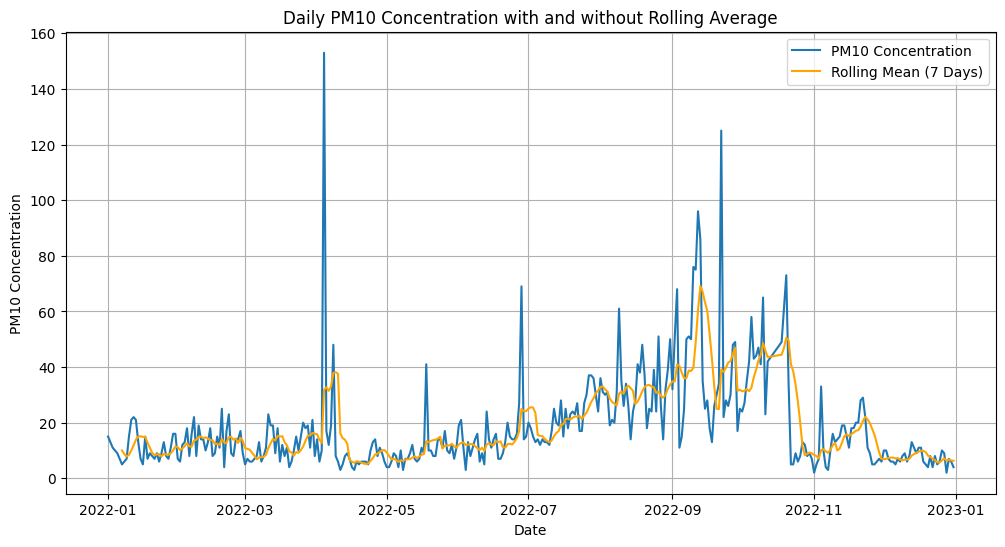

In [5]:

df['Date'] = pd.to_datetime(df['Date'])

# Calculate rolling mean for Daily Mean PM10 Concentration
window_size = 7
df['RollingMean_7Days'] = df['Daily Mean PM10 Concentration'].rolling(window=window_size).mean()

# Create a line plot for Daily Mean PM10 Concentration with and without rolling average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily Mean PM10 Concentration'], label='PM10 Concentration')
plt.plot(df['Date'], df['RollingMean_7Days'], label='Rolling Mean (7 Days)', color='orange')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration')
plt.title('Daily PM10 Concentration with and without Rolling Average')
plt.legend()
plt.grid()
plt.show()


In [6]:
# Comparison between the original pm10 and the RollingMean_7Days
df[['Daily Mean PM10 Concentration', 'RollingMean_7Days']].head(20)

Daily Mean PM10 Concentration  RollingMean_7Days
0                              15                NaN
1                              13                NaN
2                              11                NaN
3                              10                NaN
4                               9                NaN
5                               7                NaN
6                               5          10.000000
7                               6           8.714286
8                               7           7.857143
9                              15           8.428571
10                             21          10.000000
11                             22          11.857143
12                             21          13.857143
13                             13          15.000000
14                              7          15.142857
15                              5          14.857143
16                             15          14.857143
17                              7          12.857143
18                              9          11.000000
19                              8           9.142857

# **Example 3: Expanding Mean**
Expanding Mean Feature (also known as Cumulative Mean Feature) is a technique in time series analysis that calculates for each time point the average of all data from the beginning of the series to that time point. Unlike Rolling Mean, Expanding Mean does not consider a fixed window size but is always calculated from the beginning of the time series. \
The cumulative average feature is very suitable for observing and analyzing long-term trends in data because it ignores short-term data fluctuations or noise. For data that is generally very volatile, it can also provide a relatively more stable dataset to analyze the long-term performance of the data. It's very useful for comparing new data to the average so far. For this dataset, we can tell very quickly whether the air quality on a given day is higher or lower than the average air quality so far. It is also very good at capturing how new data changes the overall data. For example, for this dataset, if the air quality gradually improves or deteriorates over a long period of time, we can capture this change.

In [7]:
# Read csv file
df = pd.read_csv("Washington_new.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Compute the cumulative average of 'Daily Mean PM10 Concentration' using Expanding Window Feature
df['Expanding_Mean_PM10'] = df['Daily Mean PM10 Concentration'].expanding().mean()

# Extract the data we need to use and create a new data frame
new_df = df[['Date', 'Daily Mean PM10 Concentration', 'Expanding_Mean_PM10']]
new_df

Date  Daily Mean PM10 Concentration  Expanding_Mean_PM10
0   2022-01-01                             15            15.000000
1   2022-01-02                             13            14.000000
2   2022-01-03                             11            13.000000
3   2022-01-04                             10            12.250000
4   2022-01-05                              9            11.600000
..         ...                            ...                  ...
355 2022-12-27                              9            18.438202
356 2022-12-28                              2            18.392157
357 2022-12-29                              7            18.360335
358 2022-12-30                              6            18.325905
359 2022-12-31                              4            18.286111

[360 rows x 3 columns]

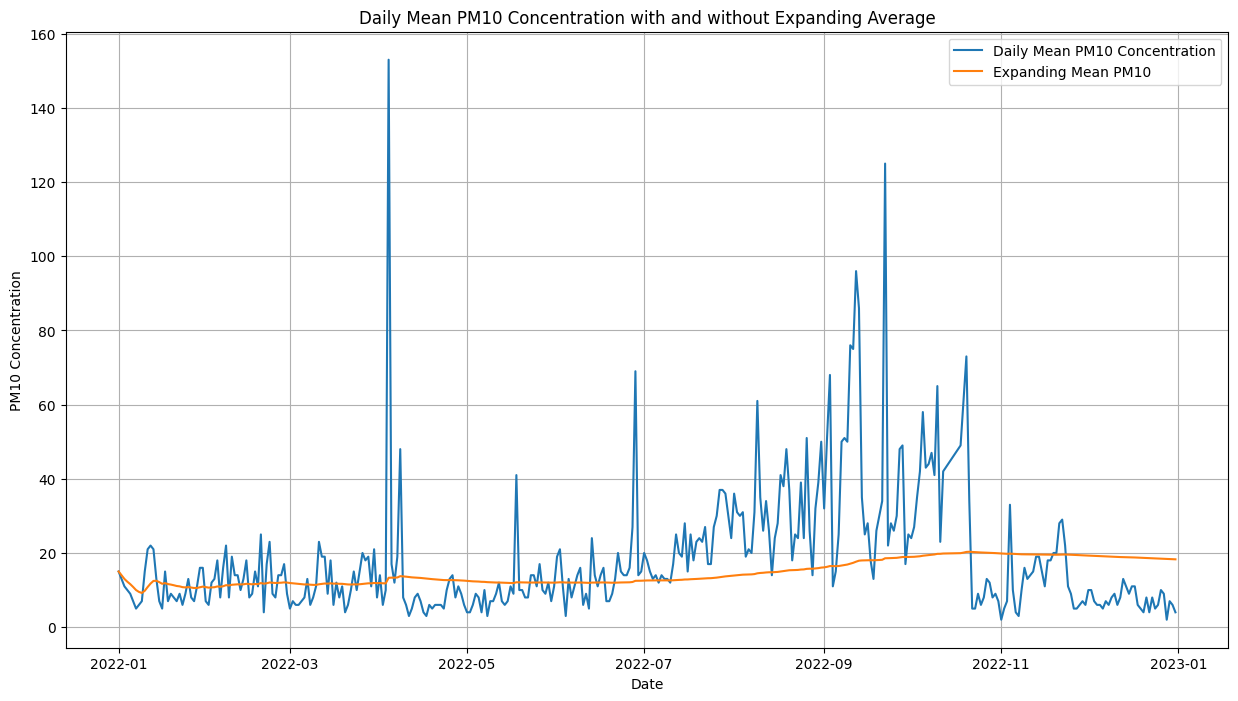

In [8]:
# Plot all points to see the trends of both curves
plt.figure(figsize=(15, 8))
plt.plot(new_df["Date"], new_df["Daily Mean PM10 Concentration"], label = "Daily Mean PM10 Concentration")
plt.plot(new_df["Date"], new_df["Expanding_Mean_PM10"], label = "Expanding Mean PM10")
plt.xlabel("Date")
plt.ylabel("PM10 Concentration")
plt.title("Daily Mean PM10 Concentration with and without Expanding Average")
plt.legend()
plt.grid()
plt.show()

# **Example 4: Geographic Grid Features**
Geographic grid features is a type of feature engineering method that analyzes data based on geographic location features. It can use geographic features such as latitude and longitude to determine the location of a city, and then use the grid to categorize cities that are geographically similar. The average temperature of the cities in the same grid is calculated as the temperature of the area. The reason I chose this method is because spatial and temporal data has multidimensional features. For example, in our data, it includes three months of daily data for 196 countries and regions. Even if we just want to observe the relationship between the temperature data and the location data of each country and region, it is more difficult. This is where Geographic grid features come in, which categorizes the 196 countries into different grids based on their geographic location, and displays the data in the corresponding grids using their average temperatures. This can help us observe temperature distribution.

In [9]:
#load the data for example 4
global_data = pd.read_csv('GlobalWeatherRepository.csv')
global_data

country     location_name  latitude  longitude         timezone  \
0      Afghanistan             Kabul     34.52      69.18       Asia/Kabul   
1          Albania            Tirana     41.33      19.82    Europe/Tirane   
2          Algeria           Algiers     36.76       3.05   Africa/Algiers   
3          Andorra  Andorra La Vella     42.50       1.52   Europe/Andorra   
4           Angola            Luanda     -8.84      13.23    Africa/Luanda   
...            ...               ...       ...        ...              ...   
10516    Venezuela           Caracas     10.50     -66.92  America/Caracas   
10517      Vietnam             Hanoi     21.03     105.85     Asia/Bangkok   
10518        Yemen             Sanaa     15.35      44.21        Asia/Aden   
10519       Zambia            Lusaka    -15.42      28.28    Africa/Lusaka   
10520     Zimbabwe            Harare    -17.82      31.04    Africa/Harare   

       last_updated_epoch      last_updated  temperature_celsius  \
0              1693301400  2023-08-29 14:00                 28.8   
1              1693301400  2023-08-29 11:30                 27.0   
2              1693301400  2023-08-29 10:30                 28.0   
3              1693301400  2023-08-29 11:30                 10.2   
4              1693301400  2023-08-29 10:30                 25.0   
...                   ...               ...                  ...   
10516          1697833800  2023-10-20 16:30                 36.0   
10517          1697833800   2023-10-21 3:30                 25.0   
10518          1697833800  2023-10-20 23:30                 16.3   
10519          1697833800  2023-10-20 22:30                 22.7   
10520          1697833800  2023-10-20 22:30                 20.1   

       temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                        83.8          Sunny  ...                7.9   
1                        80.6  Partly cloudy  ...               28.2   
2                        82.4  Partly cloudy  ...                6.4   
3                        50.4          Sunny  ...                0.5   
4                        77.0  Partly cloudy  ...              139.6   
...                       ...            ...  ...                ...   
10516                    96.8  Partly cloudy  ...               16.8   
10517                    77.0          Clear  ...               17.6   
10518                    61.3          Clear  ...               17.9   
10519                    72.8          Clear  ...               13.8   
10520                    68.2          Clear  ...               31.2   

       air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0                  11.1                         1                          1   
1                  29.6                         2                          3   
2                   7.9                         1                          1   
3                   0.8                         1                          1   
4                 203.3                         4                         10   
...                 ...                       ...                        ...   
10516              17.2                         2                          2   
10517              21.3                         2                          2   
10518              87.1                         2                          2   
10519              21.5                         1                          2   
10520              43.6                         2                          3   

       sunrise   sunset  moonrise   moonset       moon_phase  \
0      5:24 AM  6:24 PM   5:39 PM   2:48 AM   Waxing Gibbous   
1      6:04 AM  7:19 PM   6:50 PM   3:25 AM   Waxing Gibbous   
2      6:16 AM  7:21 PM   6:46 PM   3:50 AM   Waxing Gibbous   
3      7:16 AM  8:34 PM   8:08 PM   4:38 AM   Waxing Gibbous   
4      6:11 AM  6:06 PM   4:43 PM   4:41 AM   Waxing Gibbous   
...        ...      ...       ...       ...    

In [10]:
#feature engineering
global_data['month'] = pd.to_datetime(global_data['last_updated']).dt.month #convert the time feature from daily to monthly
data_AUG = global_data[global_data['month']==8] #we only want the temperature data from August
AUG_use = data_AUG.groupby('location_name')['latitude', 'longitude', 'temperature_celsius'].mean() #calculate the mean temperature for every cities

temp_gpd = gpd.GeoDataFrame(AUG_use, geometry=gpd.points_from_xy(AUG_use['longitude'], AUG_use['latitude']))
grid_size = 40 #size of the grid
#make grid
min_x, min_y, max_x, max_y = temp_gpd.total_bounds #find the boundary
x_bins = np.arange(min_x, max_x + grid_size, grid_size)
y_bins = np.arange(min_y, max_y + grid_size, grid_size)
temp_gpd['Grid'] = np.digitize(temp_gpd['longitude'], x_bins) + np.digitize(temp_gpd['latitude'], y_bins) * 100 #create a new feature "Grid"

#calculate the mean temperature for each grid
temp_mean_grid = temp_gpd.groupby('Grid')['temperature_celsius'].mean().reset_index()
temp_mean_grid.columns = ['Grid', 'Temp_mean']
print(pd.DataFrame(temp_mean_grid))

    Grid  Temp_mean
0    101  26.333333
1    103  18.718750
2    105  23.658333
3    106  17.712500
4    108  27.266667
5    109  22.752381
6    202  19.500000
7    203  27.033696
8    204  26.679167
9    205  25.080000
10   206  27.704348
11   207  26.754762
12   208  28.714286
13   209  28.944444
14   302  22.625000
15   303  16.750000
16   304  10.500000
17   305  16.927193
18   306  21.316667
19   307  21.808333
20   308  22.111111


<ipython-input-10-a02188059c1b>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AUG_use = data_AUG.groupby('location_name')['latitude', 'longitude', 'temperature_celsius'].mean() #calculate the mean temperature for every cities


In [11]:
grid_index = temp_mean_grid['Grid'][np.where(temp_mean_grid['Temp_mean'] == np.max(temp_mean_grid['Temp_mean']))[0][0]]
temp_gpd[temp_gpd['Grid']== grid_index] #The highest temperature group

latitude  longitude  temperature_celsius  \
location_name                                             
Majuro             7.10     171.38            30.333333   
Palikir            6.92     158.15            27.666667   
Tarawa            -0.88     169.53            28.833333   

                                 geometry  Grid  
location_name                                    
Majuro          POINT (171.38000 7.10000)   209  
Palikir         POINT (158.15000 6.92000)   209  
Tarawa         POINT (169.53000 -0.88000)   209

Majuro, Palikir, and Tarawa all have tropical climates based on geography, so temperatures are the highest in our data. After using Geographic grid features, the cumbersome temperature data became easier to observe. This also proves the feasibility of geographic grid features.

# **Example 5: Haversine Distance**
Haversine distance is a method used to calculate the shortest distance between two points on the earth. Since the Earth's surface approximates a sphere, we cannot just use Cartesian coordinates to calculate the shortest distance between two points. The haversine distance solves this problem very well: it takes into account the curvature of the earth and thus gives the great-circle distance between two geographical coordinates (given their latitudes and longitudes).

In [12]:
# Read csv file
cc = pd.read_csv("canadacities.csv")

# Extract the data we need to use and create a new data frame (Here we need to use data from all cities in Ontario)
A = cc[cc["province_id"] == "ON"][["city", "lat", "lng", "population"]]
A

city      lat      lng  population
0         Toronto  43.7417 -79.3733   5647656.0
5          Ottawa  45.4247 -75.6950   1068821.0
8        Hamilton  43.2567 -79.8692    729560.0
9     Mississauga  43.6000 -79.6500    717961.0
10       Brampton  43.6833 -79.7667    656480.0
...           ...      ...      ...         ...
1698   Assiginack  45.7333 -81.8000      1013.0
1711       Prince  46.5333 -84.5000       975.0
1712       Athens  44.6250 -75.9500       974.0
1729   Chatsworth  44.3800 -80.8700       560.0
1736   Magnetawan  45.6667 -79.6333       268.0

[345 rows x 4 columns]

In [13]:
# Define haversine_distance function
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = (np.sin(dlat / 2.0) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2.0) ** 2)
    c = 2.0 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Function to get distances from the original city to all other cities
def distances_from_city(df, original_city):
    # Extract latitude and longitude for the original city
    original_data = df[df['city'] == original_city].iloc[0]
    lat_original, lng_original = original_data['lat'], original_data['lng']

    # Calculate the distance for each row in the dataframe
    df['distance_to_' + original_city] = df.apply(lambda row:
                                                0 if row['city'] == original_city
                                                else haversine_distance(lat_original, lng_original, row['lat'], row['lng']), axis=1)
    return df[['city', 'distance_to_' + original_city]]

# Use the function
distance_Ottawa_df = distances_from_city(A, 'Ottawa')

# Combine all information we need and create a new data frame
new_A = pd.merge(distance_Ottawa_df, A[["city", "lat", "lng", "population"]], on = "city")
new_A

city  distance_to_Ottawa      lat      lng  population
0        Toronto          346.185389  43.7417 -79.3733   5647656.0
1         Ottawa            0.000000  45.4247 -75.6950   1068821.0
2       Hamilton          410.166712  43.2567 -79.8692    729560.0
3    Mississauga          373.447672  43.6000 -79.6500    717961.0
4       Brampton          376.204074  43.6833 -79.7667    656480.0
..           ...                 ...      ...      ...         ...
340   Assiginack          476.261437  45.7333 -81.8000      1013.0
341       Prince          691.070106  46.5333 -84.5000       975.0
342       Athens           91.152868  44.6250 -75.9500       974.0
343   Chatsworth          423.728823  44.3800 -80.8700       560.0
344   Magnetawan          307.838896  45.6667 -79.6333       268.0

[345 rows x 5 columns]

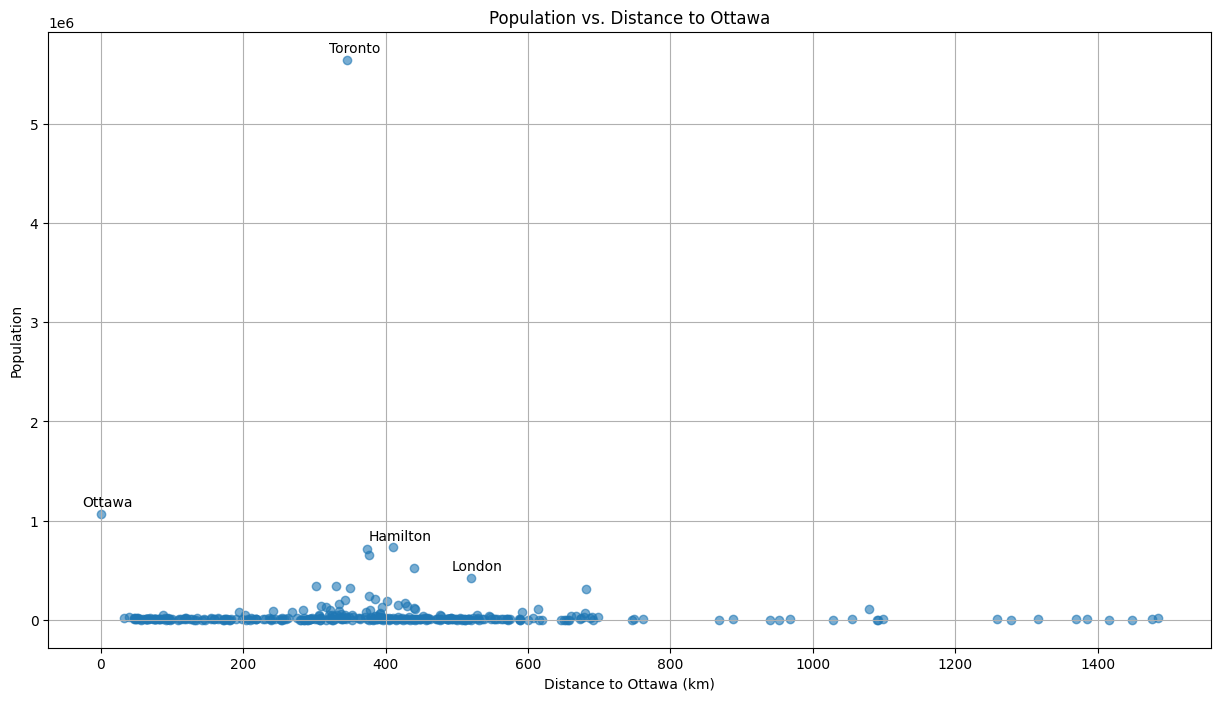

In [14]:
# Use scatter plot to show the relationship between population and distance to Ottawa
plt.figure(figsize=(15, 8))
plt.scatter(new_A['distance_to_Ottawa'], new_A['population'], alpha=0.6)

# Label some important cities on scatter plot
cities_to_label = ['Toronto', 'Ottawa', 'Hamilton', 'London']  # Change or add cities as needed
for city in cities_to_label:
    city_data = new_A[new_A['city'] == city].iloc[0]
    plt.annotate(city,
                 (city_data['distance_to_Ottawa'], city_data['population']),
                 textcoords="offset points",  # Positioning of the text
                 xytext=(5,5),  # Distance from the point to text
                 ha='center')  # Horizontal alignment

plt.title('Population vs. Distance to Ottawa')
plt.xlabel('Distance to Ottawa (km)')
plt.ylabel('Population')
plt.grid(True)
plt.show()

# **What We Need to Improve**

**Expanding Mean**\
Because expanding mean calculates the average of all previous data, the analysis of changes or trends in recent data cannot be quickly and obviously reflected. In this respect, rolling mean has very obvious advantages.\
In addition, an outlier can have a very long-lasting impact on the expanding mean. If this outlier is extremely large or extremely small, it may seriously deviate from the average, thus affecting our analysis and evaluation of the overall data.

<br>

**Haversine Distance**\
If two geographical coordinates are too close to each other, there is no need to use Haversine Distance, since the effect from the curvature of the earth on calculating distance is almost negligible. For the dataset we used in Example 5, the distance between the two cities is so close that the curvature of the earth is almost irrelevant.

# **Reference for our data**
"canadacities.csv" : https://simplemaps.com/data/canada-cities \

'GlobalWeatherRepository.csv' : https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository \

'Washington_new.csv' ：https://www.epa.gov/outdoor-air-quality-data/download-daily-data (Daily Data | US EPA)

Rolling Mean/Expanding Mean: https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/ \

Haversine Distance Formula: https://en.wikipedia.org/wiki/Haversine_formula

https://chat.openai.com/share/6876cc10-7590-409c-ac29-8ced66c06a99 \

https://chat.openai.com/share/bd1c0fd6-060b-485d-9d1b-658fc4fefe19 \

https://chat.openai.com/share/83a758e1-7f52-49de-a7d6-e3389a659476
